In [9]:
from numpy.random import RandomState
import pandas as pd
import os
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt

In [17]:
df = pd.read_csv('data/fer2013.csv')
rng = RandomState()
df = df.drop(columns='Usage', axis=1)
count =  df['emotion'].value_counts()

<BarContainer object of 7 artists>

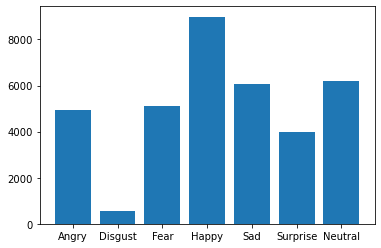

In [18]:
count = count.sort_index()
names = ['Angry', 'Disgust', 'Fear', 'Happy', 'Sad', 'Surprise', 'Neutral']
plt.bar(names, count)

In [ ]:
train = df.sample(frac=0.8, random_state=rng)
test = df.loc[~df.index.isin(train.index)]

In [ ]:
train.to_csv('data/train.csv', index=False)
test.to_csv('data/test.csv', index=False)

In [ ]:
train['emotion'].value_counts()

In [ ]:
test['emotion'].value_counts()

generate images from csv data

In [ ]:
def save_images(datatype='train'):
        foldername= "data/"+datatype
        csvfile_path= "data/"+datatype+'.csv'
        if not os.path.exists(foldername):
            os.mkdir(foldername)

        data = pd.read_csv(csvfile_path)
        images = data['pixels'] #dataframe to series pandas
        numberofimages = images.shape[0]
        for index in range(numberofimages):
            imgarray_str = images[index].split(' ')
            imgarray = np.asarray(imgarray_str,dtype=np.uint8).reshape(48,48)
            img =  Image.fromarray(imgarray)
            # img = self.str_to_image(images[index])
            img.save(os.path.join(foldername,'{}{}.jpg'.format(datatype,index)),'JPEG')
        print('Done saving {} data'.format((foldername)))

In [ ]:
save_images('test')
save_images('train')